In [1]:
import sys

#sys.path.insert(0, 'backend_functions')

#import selection_functions as sf

import importlib

import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb

import awkward
import matplotlib.pyplot as plt
import pandas as pd

import ROOT
from ROOT import TH1F, TH2F, TDirectory, TH1D

from matplotlib import gridspec


Welcome to JupyROOT 6.24/02


In [2]:
ending = "Dec19_noTune"

In [4]:
##Regular tune prior true and smearcept to be used


#prior true
#"nue_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_blockwise_recoCut_comb_"+ending+".csv"

In [3]:
####Load in noTune full event counts

nue_data_signal = pd.read_csv("nue_full_500_catsel_nopions_leptonMom_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", header=None)

nue_data_signal = nue_data_signal.values[:, 0]

print(nue_data_signal)
print("")

######

numu_data_signal = pd.read_csv("numu_full_500_catsel_nopions_leptonMom_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", header=None)

numu_data_signal = numu_data_signal.values[:, 0]

print(numu_data_signal)

[45.62040923 60.82431639 39.60692431 22.79596798 12.96829047  6.67825359
  3.83692997  6.63660487]

[448.81356496 988.9507723  323.24359523 123.50039749  48.79397929
  20.46030038   4.93699402   3.43488169]


In [6]:
###Load in regular tune bkg event counts
#Include ext in bkg count here as the full event counts do

ending = "Dec19" #need this ending as bkg is from regular tune



nue_bkg_inc_ext = pd.read_csv("nue_nopions_leptonMom_usingSelection_comb_cv_nue_bkg_incExt_"+ending+".csv", header=None)

nue_bkg_inc_ext = nue_bkg_inc_ext.values[:, 0]

print(nue_bkg_inc_ext)
print("")

#######################

numu_bkg_inc_ext = pd.read_csv("numu_nopions_leptonMom_usingSelection_comb_cv_numu_bkg_incExt_"+ending+".csv", header=None)

numu_bkg_inc_ext = numu_bkg_inc_ext.values[:, 0]

print(numu_bkg_inc_ext)
print("")

[28.13687282 19.6151705  13.40456583  7.33735493  5.00524053  2.44188302
  1.16436337  2.70567606]

[223.28540944 385.4298186  115.05806545  42.66571382  12.55655181
   6.70147453   1.52686615   2.00407337]



In [7]:
####So then can calculate the data signal input to the unfolding

nue_datasig_bkg_subtracted = nue_data_signal - nue_bkg_inc_ext
print(nue_datasig_bkg_subtracted)
print("")

numu_datasig_bkg_subtracted = numu_data_signal - numu_bkg_inc_ext
print(numu_datasig_bkg_subtracted)

[17.48353641 41.20914589 26.20235848 15.45861305  7.96304994  4.23637057
  2.67256661  3.93092881]

[225.52815552 603.52095369 208.18552978  80.83468367  36.23742747
  13.75882584   3.41012787   1.43080832]


In [8]:
nue_numu_tot = np.concatenate((nue_datasig_bkg_subtracted, numu_datasig_bkg_subtracted), axis=0)

print(nue_numu_tot)
print(len(nue_numu_tot))

[ 17.48353641  41.20914589  26.20235848  15.45861305   7.96304994
   4.23637057   2.67256661   3.93092881 225.52815552 603.52095369
 208.18552978  80.83468367  36.23742747  13.75882584   3.41012787
   1.43080832]
16


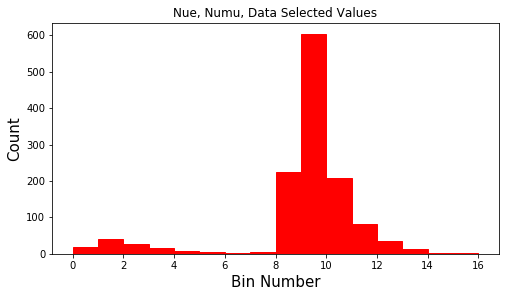

In [9]:
nue_numu_fig = plt.figure(figsize=(8, 7))
nue_numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_numu_ax1 = plt.subplot(nue_numu_gs[0])


#bins = np.arange(0, 10.5, 0.5)
#count = np.linspace(0.1, 9.6, 20)
bins = np.arange(0, 17, 1)
count = np.arange(0.0, 16.0, 1)


sel_ratio = nue_numu_ax1.hist(count, bins, edgecolor='red', facecolor='red', weights=nue_numu_tot)
nue_numu_ax1.set_ylabel('Count', fontsize=15)
nue_numu_ax1.set_xlabel('Bin Number', fontsize=15)
nue_numu_ax1.set_title("Nue, Numu, Data Selected Values")
#leg = nue_numu_ax1.legend()
#nue_numu_ax1.set_ylim([0, 1])

nue_numu_fig.savefig("data_signal_MC_noTune_input_leptonMom_comb_"+ending+".svg", bbox_inches='tight')

In [10]:
np.savetxt("data_signal_MC_noTune_input_leptonMom_comb_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')

print(ending)

Dec19


In [13]:
####Now need to get in the uncertainties

###First up, get the noTune statistical uncertinaty. This will be from sig + bkg in noTune

ending = "Dec19_noTune" 


nue_sig_unc = pd.read_csv("nue_total_noTune_err_squared_lepton_comb_"+ending+".csv", header=None)

nue_sig_unc = nue_sig_unc.values[:, 0]

print(nue_sig_unc)
print("")

########################

numu_sig_unc = pd.read_csv("numu_total_noTune_err_squared_lepton_comb_"+ending+".csv", header=None)

numu_sig_unc = numu_sig_unc.values[:, 0]

print(numu_sig_unc)
print("")

[8.92053909 3.58995425 1.54667227 0.91902918 0.70242097 0.2632695
 0.13234823 0.40028596]

[115.36294196 227.02120026  69.34826153  24.80035418   9.52952982
   4.06292642   0.96598013   0.78489182]



In [17]:
####The regular tune bkg stat uncertainties

ending = "Dec19" #need this ending as bkg is from regular tune


nue_bkg_unc = pd.read_csv("nue_bkg_exp_err_squared_lepton_comb_"+ending+".csv", header=None)

nue_bkg_unc = nue_bkg_unc.values[:, 0]

print(nue_bkg_unc)
print("")

########################

numu_bkg_unc = pd.read_csv("numu_bkg_exp_err_squared_lepton_comb_"+ending+".csv", header=None)

numu_bkg_unc = numu_bkg_unc.values[:, 0]

print(numu_bkg_unc)
print("")

[8.86804497 3.17666948 1.42344224 0.7432552  0.55003876 0.20502323
 0.09003998 0.33467734]

[ 76.17615008 112.08352694  33.72979711  18.96662017   4.00753197
   1.41609575   0.33281639   0.4749756 ]



In [18]:
nue_stat_unc = nue_sig_unc + nue_bkg_unc
print(nue_stat_unc)
print("")

########################

numu_stat_unc = numu_sig_unc + numu_bkg_unc
print(numu_stat_unc)
print("")

#########################

nue_numu_tot_unc = np.concatenate((nue_stat_unc, numu_stat_unc), axis=0)

print(nue_numu_tot_unc)

[17.78858406  6.76662374  2.9701145   1.66228439  1.25245973  0.46829273
  0.22238821  0.7349633 ]

[191.53909205 339.1047272  103.07805864  43.76697435  13.53706179
   5.47902217   1.29879652   1.25986742]

[1.77885841e+01 6.76662374e+00 2.97011450e+00 1.66228439e+00
 1.25245973e+00 4.68292730e-01 2.22388211e-01 7.34963305e-01
 1.91539092e+02 3.39104727e+02 1.03078059e+02 4.37669743e+01
 1.35370618e+01 5.47902217e+00 1.29879652e+00 1.25986742e+00]


In [19]:
nue_numu_cov_stats   = np.zeros([(len(bins)-1), (len(bins)-1)])
print(nue_numu_cov_stats)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [20]:
nue_numu_cov_stats[np.diag_indices_from(nue_numu_cov_stats)]    = nue_numu_tot_unc

In [24]:
###Then sprinkle in the regular tune genie sys uncertainties

# Load in the blockwise genie cov matrix

blockwise_genie_err = pd.read_csv("blockwise_cov_genie_only_leptonMom_comb_"+ending+".csv", header=None)

blockwise_genie_err = blockwise_genie_err.values
print(blockwise_genie_err)

[[ 2.62188050e+01  4.57897982e+01  3.52087460e+01  2.11147219e+01
   9.41504806e+00  4.15565882e+00  2.92263632e+00  3.82826664e+00
   1.51263110e+02  2.98778502e+02  8.98106928e+01  3.47469510e+01
   1.40198562e+01  5.37672361e+00  1.22286766e+00  1.41126222e+00]
 [ 4.57897982e+01  1.20581919e+02  9.73463861e+01  5.87973988e+01
   2.46997669e+01  1.11651841e+01  8.19476042e+00  1.00007731e+01
   5.24152005e+01  8.42741225e+01  6.50602783e+00  2.48080955e+00
   2.38133784e+00  3.55387884e-01 -9.29739610e-01  4.43287447e-01]
 [ 3.52087460e+01  9.73463861e+01  8.14716650e+01  4.95217662e+01
   2.02140625e+01  8.85941825e+00  6.81250045e+00  8.08140831e+00
   3.00934440e+01  5.45126345e+01  1.00651664e+01  4.25673915e+00
   2.20708981e+00  4.86891565e-01 -2.64186604e-01  2.53130768e-01]
 [ 2.11147219e+01  5.87973988e+01  4.95217662e+01  3.06805624e+01
   1.22855734e+01  5.39738482e+00  4.17171030e+00  4.85501564e+00
   1.50100327e+01  3.03140004e+01  3.04109042e+00  1.83983254e+00
   1.50

In [25]:
##### Now make the total cov matrix

total_noTune_input_cov = nue_numu_cov_stats + blockwise_genie_err

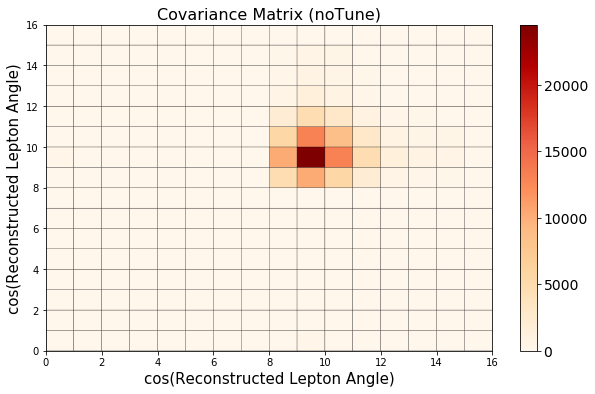

In [26]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_noTune_input_cov, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#if pot: 
#    cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("cos(Reconstructed Lepton Angle)", fontsize=15)
plt.ylabel("cos(Reconstructed Lepton Angle)", fontsize=15)

plt.title('Covariance Matrix (noTune)', fontsize=16)


plt.savefig("data_covmat_MC_noTune_input_leptonMom_comb_"+ending+".svg", bbox_inches='tight')

plt.show()

In [27]:
np.savetxt("data_covmat_MC_noTune_input_leptonMom_comb_"+ending+".csv", 
           total_noTune_input_cov,
           delimiter =", ", 
           fmt ='% s')

In [28]:
ending

'Dec19'